# Рынок заведений общественного питания Москвы

**Содержание**

[Описание проекта](#description)
1. [Общая информация](#start)
2. [Подготовка данных](#preprocessing)
3. [Анализ данных](#analysis)   
    3.1. [Соотношение видов объектов общественного питания по количеству](#1)     
    3.2. [Соотношение сетевых и несетевых заведений по количеству](#2)    
    3.3. [Для какого вида объекта общественного питания характерно сетевое распространение](#3)    
    3.4. [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#4)  
    3.5. [Какой вид объекта общественного питания предоставляет в среднем самое большое количество посадочных мест?](#5)  
    3.6. [Топ-10 улиц по количеству объектов общественного питания](#6)  
    3.7. [Число улиц с одним объектом общественного питания](#7)  
    3.8. [Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания](#8)  
4. [Общие выводы](#conclusion)   

## Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?  
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.  

**План работ**

**Шаг №1. Загрузить данные и подготовить их к анализу**  

**Шаг №2. Анализ данных**  
* Исследовать соотношение видов объектов общественного питания по количеству. Построить график.
* Исследовать соотношение сетевых и несетевых заведений по количеству. Построить график.
* Для какого вида объекта общественного питания характерно сетевое распространение?
* Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
* Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построить графики.
* Выделить в отдельный столбец информацию об улице из столбца `address`.
* Построить график топ-10 улиц по количеству объектов общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?
* Найти число улиц с одним объектом общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?
* Посмотреть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?  

Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментировать возможность развития сети. 

**Шаг №3. Подготовка презентации**  
Подготовить презентацию исследования для инвесторов.

**Описание данных**

Таблица `rest_data`:
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест.

## 1. Общая информация <a id="start"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
from io import StringIO
from collections import Counter

plt.style.use('ggplot')
sns.set_style("dark") 

Загрузим данные об **объектах общественного питания** (далее - **ООП**) Москвы в таблицу и рассмотрим общую информацию о таблице.

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')
pd.set_option('max_colwidth', 100)
df.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
df.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


Рассмотрим уникальные значения в столбцах `object_type` и `chain`.

In [5]:
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [6]:
df['chain'].unique()

array(['нет', 'да'], dtype=object)

### Вывод
В таблице отсутствуют пропуски и типы данных соответствуют содержимому.  
Для поиска дубликатов необходимо привести названия объектов к нижнему регистру. Кроме того, названия некоторых заведений записаны в кавычках и с типом объекта, например, Кафе «Академия». Т.к. тип объекта может присутствовать в названии, как в Буфет МТУСИ и Столовая МТУСИ, то тип объекта в названии оставим, а кавычки удалим. 

План подготовки данных для анализа:  

* привести названия и адрес к нижнему регистру,
* удалить кавычки из названий объектов,
* проверить наличие дубликатов.

## 2. Подготовка данных <a id="preprocessing"></a>

Приведем названия и адреса объектов к нижнему регистру и удалим кавычки из названий.

In [7]:
df['object_name_lower'] = df['object_name'].str.lower()
df['address_lower'] = df['address'].str.lower()

df['object_name_lower'] = df['object_name_lower'].str.replace('«', '')
df['object_name_lower'] = df['object_name_lower'].str.replace('»', '')

df.head()

,id,object_name,chain,object_type,address,number,object_name_lower,address_lower
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,"город москва, улица егора абакумова, дом 9"
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,"город москва, улица талалихина, дом 2/1, корпус 1"
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия,"город москва, абельмановская улица, дом 6"
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,"город москва, абрамцевская улица, дом 1"
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель,"город москва, абрамцевская улица, дом 9, корпус 1"


Проверим наличие дубликатов.

In [8]:
df.duplicated().sum()

0

In [9]:
df.duplicated(subset=['object_name_lower', 'chain', 'object_type', 'address_lower', 'number']).sum()

85

Удалим дубликаты объектов.

In [10]:
df = df.drop_duplicates(subset = ['object_name_lower', 'chain', 'object_type', 'address_lower', 'number'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 8 columns):
id                   15281 non-null int64
object_name          15281 non-null object
chain                15281 non-null object
object_type          15281 non-null object
address              15281 non-null object
number               15281 non-null int64
object_name_lower    15281 non-null object
address_lower        15281 non-null object
dtypes: int64(2), object(6)
memory usage: 1.0+ MB


### Вывод
Из таблицы удалены 85 дубликатов объектов общественного питания.

## 3. Анализ данных <a id="analysis"></a>

### 3.1. Соотношение видов объектов общественного питания по количеству <a id="1"></a>

Сосчитаем количество объектов по типам ООП.

In [11]:
objects_count_by_type = df.groupby('object_type')['id'].count().sort_values(ascending=False)
objects_count_by_type.reset_index()

,object_type,id
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,предприятие быстрого обслуживания,1897
4,бар,855
5,буфет,576
6,кафетерий,395
7,закусочная,348
8,магазин (отдел кулинарии),273


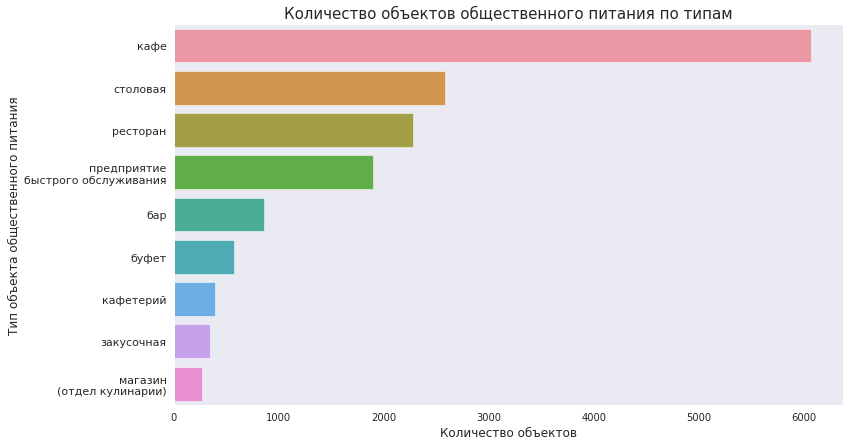

In [12]:
plt.figure(figsize=(12, 7))

ax=sns.barplot(x = 'id', y = 'object_type', data = objects_count_by_type.reset_index())

plt.title('Количество объектов общественного питания по типам', fontsize = 15)
plt.xlabel('Количество объектов', fontsize=12)
plt.ylabel('Тип объекта общественного питания', fontsize=12)
labels = ['кафе', 'столовая', 'ресторан',
       'предприятие\nбыстрого обслуживания', 'бар', 'буфет', 'кафетерий',
       'закусочная', 'магазин\n(отдел кулинарии)']
ax.set_yticklabels(labels,
                   fontsize = 11)


plt.show()

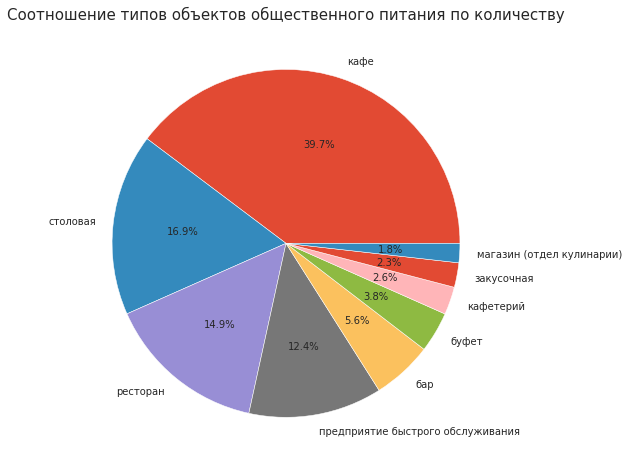

In [13]:
objects_count_by_type.plot(kind = 'pie', subplots = True, figsize = (8, 8), autopct = '%1.1f%%')

plt.title('Соотношение типов объектов общественного питания по количеству', fontsize = 15)
plt.ylabel('')

plt.show()

#### Вывод
Количество объектов с типом  "кафе" - 6071, почти 40% от общего числа объектов в Москве. На втором месте по количеству объектов тип "столовая" - 17%, на третьем - "ресторан" - 15%. Возможно кафе занимают большую долю рынка за счет популярности таких заведений у большего числа потребителей, а также большей прибыльностью по сравнению с другими типами ООП.

### 3.2. Соотношение сетевых и несетевых заведений по количеству <a id="2"></a>

Рассмотрим количество сетевых и несетевых объектов.

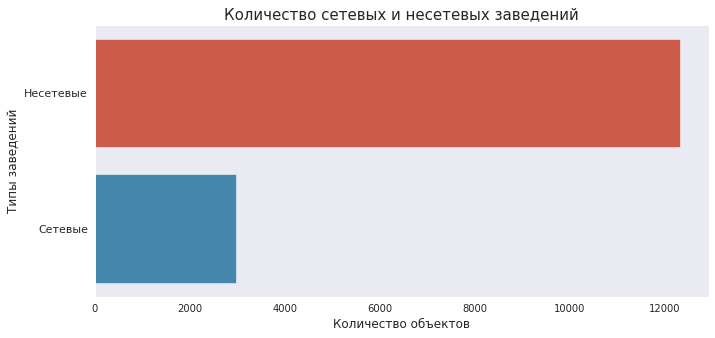

In [14]:
plt.figure(figsize = (11, 5))

ax = sns.countplot(y = 'chain', data = df)

plt.title('Количество сетевых и несетевых заведений', fontsize = 15)
plt.xlabel('Количество объектов', fontsize = 12)
plt.ylabel('Типы заведений', fontsize = 12)
ax.set_yticklabels(['Несетевые', 'Сетевые'], fontsize = 11)

plt.show()

In [15]:
objects_count_by_chain = df.groupby('chain')['id'].count().sort_values(ascending = False)
objects_count_by_chain

chain
нет    12317
да      2964
Name: id, dtype: int64

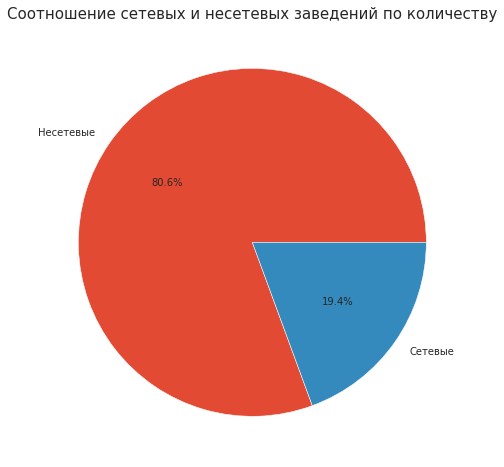

In [16]:
labels = ['Несетевые', 'Сетевые']

objects_count_by_chain.plot(kind = 'pie', subplots = True, figsize = (8, 8), autopct = '%1.1f%%', labels = labels)

plt.title('Соотношение сетевых и несетевых заведений по количеству', fontsize = 15)
plt.ylabel('')

plt.show()

#### Вывод
К несетевым ООП относятся 12317 объектов, или 80,6%. Сетевых объектов в 4 раза меньше - 2964 объекта. Скорее всего открытие сетевых объектов более сложное и затратное предприятие, на которое решаются малое количество предпринимателей.

### 3.3. Для какого вида объекта общественного питания характерно сетевое распространение <a id="3"></a>

Рассмотрим количество сетевых и несетевых объектов по типам и рассмотрим, какую долю занимают сетевые объекты среди заведений каждого типа.

In [17]:
objects_count = df.groupby(['object_type', 'chain'])['id'].count().reset_index()
objects_count = objects_count.merge(objects_count_by_type, left_on='object_type', right_on='object_type')
objects_count.columns = ['object_type', 'chain', 'count', 'total']
objects_count['ratio'] = objects_count['count'] / objects_count['total']
objects_count

,object_type,chain,count,total,ratio
0,бар,да,37,855,0.043275
1,бар,нет,818,855,0.956725
2,буфет,да,11,576,0.019097
3,буфет,нет,565,576,0.980903
4,закусочная,да,56,348,0.160920
5,закусочная,нет,292,348,0.839080
6,кафе,да,1396,6071,0.229946
7,кафе,нет,4675,6071,0.770054
8,кафетерий,да,52,395,0.131646
9,кафетерий,нет,343,395,0.868354


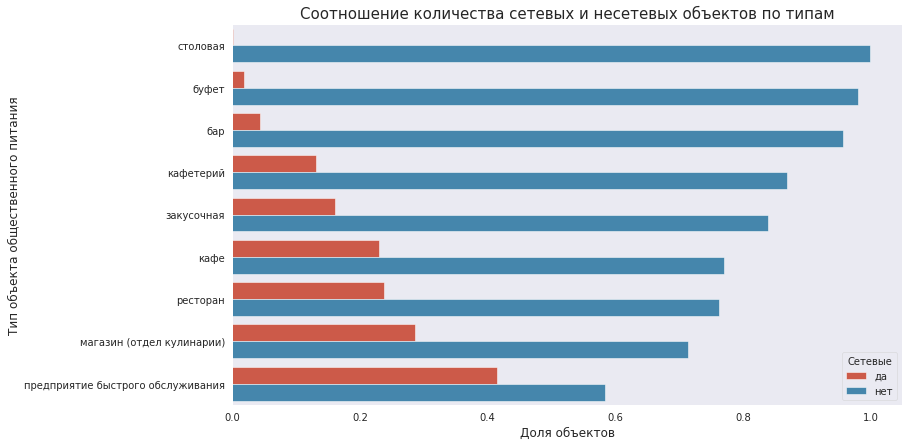

In [18]:
plt.figure(figsize = (12, 7))

ax = sns.barplot(y = "object_type", x = 'ratio', hue = 'chain', data = objects_count.sort_values(
    by = ['chain', 'ratio'], ascending = True))

plt.title('Соотношение количества сетевых и несетевых объектов по типам', fontsize = 15)
plt.ylabel('Тип объекта общественного питания', fontsize = 12)
plt.xlabel('Доля объектов', fontsize = 12)
plt.legend(title = 'Сетевые')

plt.show()

#### Вывод
Сетевое распространение наиболее характерно для предприятий быстрого обслуживания и магазинов (отделов кулинарии). Сетевые предприятия быстрого обслуживания занимают 42% от общего числа всех объектов данного типа, а магазины - 29%.
Доли сетевых ресторанов и кафе почти равны: 24% и 23% соответсвенно. Наименьшее сетевое распространение получили столовые, буфеты и бары.

### 3.4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? <a id="4"></a>

Рассмотрим распределение посадочных мест.

In [19]:
df['number'].describe()

count    15281.000000
mean        59.788234
std         74.843042
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Среди объектов общественного питания есть объекты с аномально большим количеством посадочных мест - до 1700. Выберем границы для определения аномально больших количеств посадочных мест.

In [20]:
np.percentile(df['number'], [95, 99])

array([215., 300.])

Выберем 250 за верхнюю границу количества мест, и отсеем объекты с аномальным количеством мест. Определим количество объектов для каждого сетевого заведения и среднее количество посадочных мест.

In [21]:
chain = df.query('chain == "да" and number < 250').groupby('object_name_lower')['number'].agg(['count', 'mean']).reset_index()
chain.columns = ['chain_name_lower', 'object_count', 'mean_number']
chain.head()

,chain_name_lower,object_count,mean_number
0,beverly hills diner,1,88.000000
1,bierloga,1,75.000000
2,black & white,1,40.000000
3,bocconcino,3,66.666667
4,boobo,1,46.000000


Рассмотрим распределения количества объектов и количества посадочных мест для сетей, в которых больше одного объекта.

In [22]:
chain.query('object_count > 1')['object_count'].describe()

count    246.000000
mean      10.650407
std       22.487360
min        2.000000
25%        2.000000
50%        3.500000
75%        7.000000
max      157.000000
Name: object_count, dtype: float64

In [23]:
chain.query('object_count > 1')['mean_number'].describe()

count    246.000000
mean      54.759301
std       41.815062
min        0.000000
25%       20.541667
50%       43.500000
75%       83.321429
max      213.000000
Name: mean_number, dtype: float64

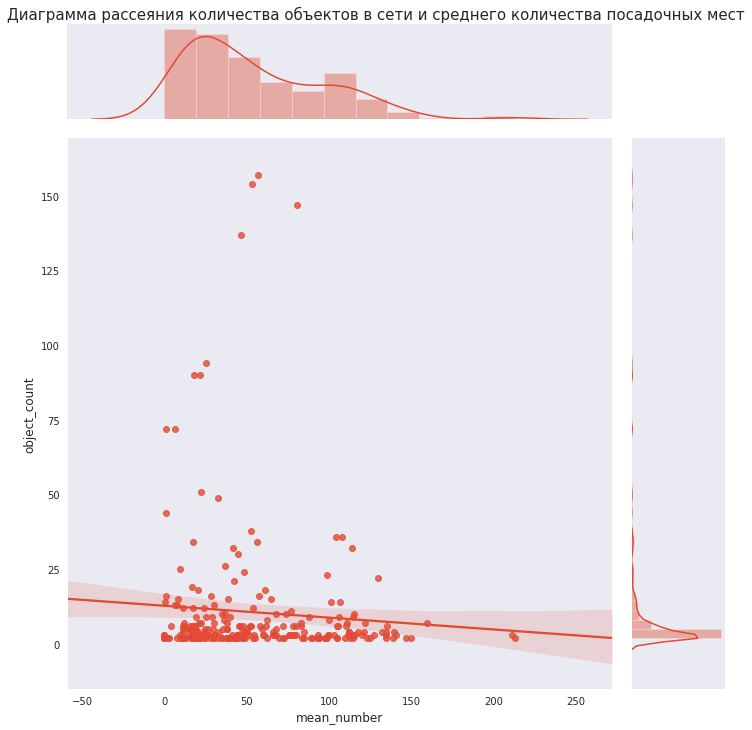

In [24]:
g = sns.jointplot(x = 'mean_number', y = 'object_count', data = chain.query('object_count > 1'), kind='reg', height=10) 

g.fig.suptitle('Диаграмма рассеяния количества объектов в сети и среднего количества посадочных мест', y = 1.01, fontsize = 15)
plt.show()

Получили отрицательную линейную корреляцию. Скорее всего, количество посадочных мест и количество объектов в сети зависят друг от друга. 

In [25]:
print('Среднее количество посадочных мест в сетях с количеством объектов меньше или равно 10: {:.0f}'.format(
    chain.query('1 < object_count <= 10')['mean_number'].mean()))
print('Среднее количество посадочных мест в сетях с количеством объектов больше 10: {:.0f}'.format(
    chain.query('object_count > 10')['mean_number'].mean()))

Среднее количество посадочных мест в сетях с количеством объектов меньше или равно 10: 57
Среднее количество посадочных мест в сетях с количеством объектов больше 10: 44


#### Выводы
Для сетевых заведений характерно в среднем 11 объектов со средним количеством посадочных мест - 55. При этом 75% сетевых заведений включают в себя меньше 7 объектов общественного питания, медиана количества объектов в сети - 4. Среднее количество посадочных мест = 55. При этом количество посадочных мест в крупных сетях в среднем 44. Обычно сетевые заведения располагаются в местах с большой проходимостью людей, в которых наблюдается большая конкуренция и дефицит места, поэтому количество мест обычно небольшое.

### 3.5. Какой вид объекта общественного питания предоставляет в среднем самое большое количество посадочных мест? <a id="5"></a>

Для каждого типа ООП найдем среднее количество посадочных мест.

In [26]:
number_of_seats = df.groupby('object_type')['number'].mean().sort_values(ascending = False).reset_index()
number_of_seats

,object_type,number
0,столовая,130.337848
1,ресторан,96.884750
2,буфет,51.425347
3,бар,43.533333
4,кафе,39.785703
5,предприятие быстрого обслуживания,20.808645
6,кафетерий,9.184810
7,закусочная,7.847701
8,магазин (отдел кулинарии),5.589744


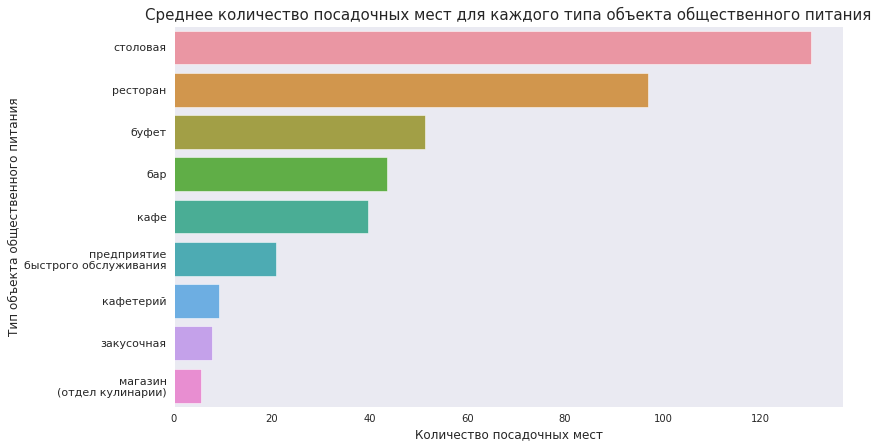

In [27]:
plt.figure(figsize = (12, 7))

ax = sns.barplot(y = 'object_type', x = 'number', data = number_of_seats)

plt.title('Среднее количество посадочных мест для каждого типа объекта общественного питания', fontsize = 15)
plt.ylabel('Тип объекта общественного питания', fontsize = 12)
plt.xlabel('Количество посадочных мест', fontsize = 12)
labels = ['столовая', 'ресторан', 'буфет', 'бар', 'кафе', 'предприятие\nбыстрого обслуживания', 'кафетерий', 'закусочная', 'магазин\n(отдел кулинарии)']
ax.set_yticklabels(labels, fontsize = 11)
plt.show()

Рассмотрим, как отличается количество посадочных мест в сетевых и несетевых объектах. 

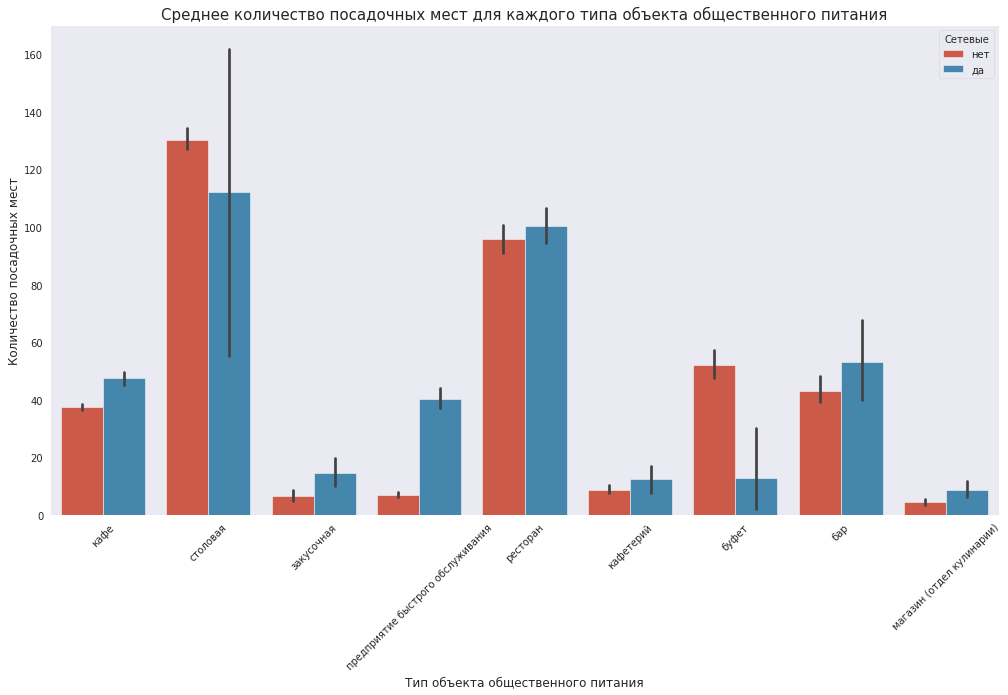

In [28]:
plt.figure(figsize=(17, 9))

ax = sns.barplot(x = 'object_type', y = 'number', data = df, hue = 'chain') 

plt.title('Среднее количество посадочных мест для каждого типа объекта общественного питания', fontsize = 15)
plt.xlabel('Тип объекта общественного питания', fontsize = 12)
plt.ylabel('Количество посадочных мест', fontsize = 12)
plt.xticks(rotation = 45)
plt.legend(title = 'Сетевые')

plt.show()

#### Вывод
Лидером по среднему количеству посадочных мест является тип объекта "столовая" - 130 мест, что характеризует основную цель данного заведения - накормить как можно больше людей в определенные часы, чаще всего в обеденное время. На втором месте "рестораны" - 97 посадочных мест. Остальные типы объектов общественного питания предоставляют значительно меньшее количество посадочных мест: в кафе в среднем 40 посадочных мест. При этом в сетевых объектах общественного питания в среднем больше посадочных мест, чем в несетевых, но не для столовых и буфетов.

### 3.6. Топ-10 улиц по количеству объектов общественного питания <a id="6"></a>

Выделим в отдельный столбец информацию об улице из столбца `address`. Для этого найдем часть адреса, содержащую один из видов улиц города Москвы. Виды улиц возьмем из <a href="https://data.mos.ru/classifier/7710168515-obshchemoskovskiy-klassifikator-ulits-moskvy-omk-001-2013-razdel-2/passport?versionNumber=1&releaseNumber=5">Общемосковского классификатора улиц Москвы (ОМК 001-2013) Раздел 2.</a>

In [29]:
street_words = ['улица','переулок','проезд','площадь','набережная','шоссе', 'тупик','бульвар','аллея','проспект', 'мост', 
                'путепровод', 'эстакада', 'просека', 'линия', 'проектируемый проезд', 'тоннель', 
                'километровый участок автодороги']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(street_words))

df["street"] = df["address"].str.extract(str_pat, flags=re.I)

df.head()

,id,object_name,chain,object_type,address,number,object_name_lower,address_lower,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,"город москва, улица егора абакумова, дом 9",улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,"город москва, улица талалихина, дом 2/1, корпус 1",улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия,"город москва, абельмановская улица, дом 6",Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,"город москва, абрамцевская улица, дом 1",Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель,"город москва, абрамцевская улица, дом 9, корпус 1",Абрамцевская улица


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 9 columns):
id                   15281 non-null int64
object_name          15281 non-null object
chain                15281 non-null object
object_type          15281 non-null object
address              15281 non-null object
number               15281 non-null int64
object_name_lower    15281 non-null object
address_lower        15281 non-null object
street               14823 non-null object
dtypes: int64(2), object(7)
memory usage: 1.8+ MB


In [31]:
print('{:.2%} адресов без улиц'.format(len(df[df["street"].isnull()])/len(df)))

3.00% адресов без улиц


Определим 10 улиц с наибольшим количеством ООП.

In [32]:
top_10_streets = df.groupby('street')['id'].count().sort_values(ascending=False).reset_index().head(10)
top_10_streets

,street,id
0,проспект Мира,203
1,Профсоюзная улица,181
2,Ленинградский проспект,170
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,147
6,проспект Вернадского,128
7,Кутузовский проспект,114
8,Каширское шоссе,111
9,Кировоградская улица,108


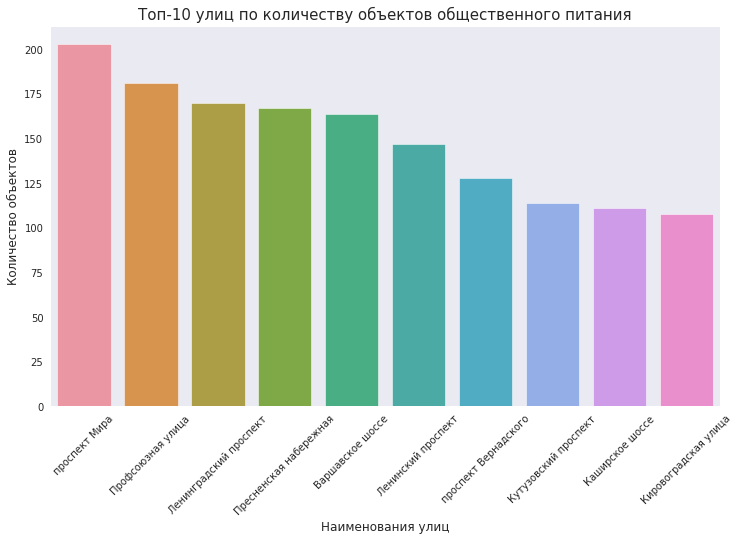

In [33]:
plt.figure(figsize = (12, 7))

ax = sns.barplot(x='street', y='id', data=top_10_streets)

plt.title('Топ-10 улиц по количеству объектов общественного питания', fontsize = 15)
plt.ylabel('Количество объектов', fontsize = 12)
plt.xlabel('Наименования улиц', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

Рассмотрим, в каких районах Москвы находятся эти улицы. Для этого загрузим таблицы с данными об улицах (<a href="https://data.mos.ru/classifier/7710168515-obshchemoskovskiy-klassifikator-ulits-moskvy-omk-001-2013-razdel-1">Общемосковский классификатор улиц Москвы (ОМК 001-2013) Раздел 1</a>) и районах Москвы (<a href="https://data.mos.ru/classifier/7710168515-obshchemoskovskiy-klassifikator-territorialnyh-edinits-moskvy-omk-002-2013-razdel-1">Общемосковский классификатор территориальных единиц Москвы (ОМК 002-2013) Раздел 1</a>).

In [34]:
id1='1T8vcS4EWTXlsCWNSLBvwUv0Ih2G-rE_n'
id2='1JuyprkSm9EVheoydf-yIBI7PFdVCaHZc'

r = requests.get(f'https://drive.google.com/u/0/uc?id={id2}&export=download')

data = r.content.decode('cp1251')

streets = pd.read_csv(StringIO(data), sep = ';')
streets.head()

,UM_CODE,UM_NAMEF,global_id,UM_NAMES,UM_TRANS,UM_TYPE,UM_TM,UM_TE,UM_KLADR,Unnamed: 9
0,008880,1-й Ирининский переулок,58481065,1-й Ирининский пер.,Pervy'j Irininskij pereulok,002,NaN,0102,77000000000706300,NaN
1,008890,2-й Ирининский переулок,58481066,2-й Ирининский пер.,Vtoroj Irininskij pereulok,002,NaN,0102,77000000000362200,NaN
2,008891,3-й Ирининский переулок,58481067,3-й Ирининский пер.,Tretij Irininskij pereulok,002,NaN,0102,77000000000362300,NaN
3,008910,Иркутская улица,58481068,Иркутская ул.,Irkutskaya ulicza,001,NaN,0406,77000000000139700,NaN
4,008920,1-й Иртышский проезд,58481069,1-й Иртышский пр.,Pervy'j Irty'shskij proezd,003,NaN,0406,77000000000331600,NaN


In [35]:
streets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 10 columns):
UM_CODE       5273 non-null object
UM_NAMEF      5273 non-null object
global_id     5273 non-null object
UM_NAMES      5273 non-null object
UM_TRANS      5273 non-null object
UM_TYPE       5273 non-null object
UM_TM         1314 non-null object
UM_TE         5273 non-null object
UM_KLADR      5083 non-null object
Unnamed: 9    0 non-null float64
dtypes: float64(1), object(9)
memory usage: 412.1+ KB


In [36]:
r = requests.get(f'https://drive.google.com/u/0/uc?id={id1}&export=download')

data = r.content.decode('cp1251')

districts = pd.read_csv(StringIO(data), sep = ';')
districts.head()

,Kod,Name,global_id,Latin_name,Type,Kod_okato,Unnamed: 6
0,100,Центральный административный округ,58703558,Czentral`ny'j administrativny'j okrug,2,45286000,NaN
1,101,район Арбат,58703559,rajon Arbat,3,45286552,NaN
2,102,Басманный район,58703560,Basmanny'j rajon,3,45286555,NaN
3,103,район Замоскворечье,58703561,rajon Zamoskvorech`e,3,45286560,NaN
4,104,Красносельский район,58703562,Krasnosel`skij rajon,3,45286565,NaN


In [37]:
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
Kod           158 non-null int64
Name          158 non-null object
global_id     158 non-null int64
Latin_name    158 non-null object
Type          158 non-null int64
Kod_okato     158 non-null int64
Unnamed: 6    0 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 8.8+ KB


Восстановим ведущий "0" в поле `Kod`, потерянный при загрузке. 

In [38]:
districts['Kod'] = districts['Kod'].astype('object')
formatting = lambda x: '{:0>4}'.format(x)
districts['Kod'] = districts['Kod'].apply(formatting)

In [39]:
districts.head()

,Kod,Name,global_id,Latin_name,Type,Kod_okato,Unnamed: 6
0,0100,Центральный административный округ,58703558,Czentral`ny'j administrativny'j okrug,2,45286000,NaN
1,0101,район Арбат,58703559,rajon Arbat,3,45286552,NaN
2,0102,Басманный район,58703560,Basmanny'j rajon,3,45286555,NaN
3,0103,район Замоскворечье,58703561,rajon Zamoskvorech`e,3,45286560,NaN
4,0104,Красносельский район,58703562,Krasnosel`skij rajon,3,45286565,NaN


Добавим коды районов для улиц из таблицы `top_10_streets`.

In [40]:
top_10_streets = top_10_streets.merge(streets, left_on = 'street', right_on = 'UM_NAMEF')
top_10_streets = top_10_streets[['street', 'id', 'UM_TE']]
top_10_streets

,street,id,UM_TE
0,проспект Мира,203,0105;0301;0309;0310;0312;0313;0317
1,Профсоюзная улица,181,0701;0704;0707;0709;0710;0712
2,Ленинградский проспект,170,0201;0202;0214;0217
3,Пресненская набережная,167,0106
4,Варшавское шоссе,164,0610;0613;0615;0619;0620;0621;0708;0711;1111
5,Ленинский проспект,147,0110;0610;0702;0706;0707;0709;0814;0817
6,проспект Вернадского,128,0702;0706;0814;0815;0817
7,Кутузовский проспект,114,0805;0819
8,Каширское шоссе,111,0612;0613;0616;0617
9,Кировоградская улица,108,0619;0620;0621


Найдем уникальные районы, по которым проходят топ-10 улиц.

In [41]:
from itertools import chain

get_district = lambda x: x.split(sep = ';')

codes_by_top_10_streets = set(chain(*top_10_streets['UM_TE'].apply(get_district).tolist())) #собираем уникальные коды в set 
districts_by_top_10_streets = districts.query('Kod in @codes_by_top_10_streets')['Name'].tolist()
districts_by_top_10_streets

['Мещанский район',
 'Пресненский район',
 'район Якиманка',
 'район Аэропорт',
 'район Беговой',
 'район Сокол',
 'Хорошёвский район',
 'Алексеевский район',
 'район Марьина Роща',
 'Останкинский район',
 'район Ростокино',
 'район Свиблово',
 'Ярославский район',
 'Донской район',
 'район Москворечье-Сабурово',
 'район Нагатино-Садовники',
 'Нагорный район',
 'район Орехово-Борисово Северное',
 'район Орехово-Борисово Южное',
 'район Чертаново Северное',
 'район Чертаново Центральное',
 'район Чертаново Южное',
 'Академический район',
 'Гагаринский район',
 'район Коньково',
 'Ломоносовский район',
 'Обручевский район',
 'район Северное Бутово',
 'район Тёплый Стан',
 'район Черёмушки',
 'район Южное Бутово',
 'район Ясенево',
 'район Дорогомилово',
 'район Проспект Вернадского',
 'район Раменки',
 'район Тропарёво-Никулино',
 'район Фили-Давыдково',
 'поселение Щербинка']

In [42]:
print('Всего районов:', len(districts_by_top_10_streets))

Всего районов: 38


#### Вывод
Самое большое количество ООП находится на проспекте Мира - 203 объекта, второе и третье место по количесту  занимают Профсоюзная улица - 181 объект и Ленинградский проспект - 170 объектов. Почти все улицы из списка топ-10 расположены сразу в нескольких районах Москвы (для 10 улиц - 38 районов), т.е. эти улицы отличаются большой протяженностью. Вероятнее всего, этот фактор повлиял на наличие большого количества ООП на них. Исключением является небольшая улица - Пресненская набережная со 167 объектами. Наличие большого количества объектов на данной улице связано с расположенным на ней Московским международным деловым центром «Москва-Сити».

### 3.7. Число улиц с одним объектом общественного питания <a id="7"></a>

Найдем количество улиц с одним ООП.

In [43]:
streets_with_one_object = df.groupby('street')['id'].count().reset_index().query('id == 1')
len(streets_with_one_object)

550

Определим, в каких районах расположены такие улицы.

In [44]:
streets_with_one_object = streets_with_one_object.merge(streets, left_on = 'street', right_on = 'UM_NAMEF')
streets_with_one_object = streets_with_one_object[['street', 'id', 'UM_TE']]
streets_with_one_object.head()

,street,id,UM_TE
0,1-й Балтийский переулок,1,0201
1,1-й Басманный переулок,1,0102;0104
2,1-й Ботанический проезд,1,0313
3,1-й Вешняковский проезд,1,0513
4,1-й Голутвинский переулок,1,0110


In [45]:
codes_streets_with_one_object = streets_with_one_object['UM_TE'].apply(get_district).sum()
count_streets_with_one_object = Counter(codes_streets_with_one_object)
count_streets_with_one_object

Counter({'0201': 8,
         '0102': 25,
         '0104': 10,
         '0313': 4,
         '0513': 5,
         '0110': 12,
         '1206': 8,
         '0109': 26,
         '0417': 12,
         '0609': 11,
         '0105': 17,
         '0107': 28,
         '0507': 12,
         '0511': 4,
         '0103': 14,
         '0217': 5,
         '0101': 17,
         '0301': 7,
         '0514': 2,
         '0312': 5,
         '0815': 3,
         '0906': 7,
         '0903': 3,
         '0309': 18,
         '0418': 11,
         '1103': 5,
         '0403': 10,
         '0510': 9,
         '0108': 20,
         '0307': 7,
         '0415': 7,
         '0811': 5,
         '0405': 2,
         '0408': 6,
         '0416': 2,
         '0202': 3,
         '0610': 6,
         '0406': 4,
         '0205': 2,
         '0213': 6,
         '1111': 10,
         '0818': 1,
         '0413': 3,
         '1104': 6,
         '0621': 1,
         '0515': 5,
         '0207': 5,
         '0711': 10,
         '0310': 3,
   

In [46]:
districts_by_streets_with_one_object = pd.DataFrame.from_dict(
    count_streets_with_one_object, 
    orient='index', 
    columns=['streets_count']
).sort_values(by = 'streets_count', ascending=False).reset_index()
districts_by_streets_with_one_object = districts_by_streets_with_one_object.merge(districts, left_on='index', right_on='Kod')
districts_by_streets_with_one_object = districts_by_streets_with_one_object[['index', 'Name', 'streets_count']]
districts_by_streets_with_one_object.head()

,index,Name,streets_count
0,0107,Таганский район,28
1,0109,район Хамовники,26
2,0102,Басманный район,25
3,0108,Тверской район,20
4,0106,Пресненский район,19


In [47]:
districts_by_streets_with_one_object.head(15)

,index,Name,streets_count
0,0107,Таганский район,28
1,0109,район Хамовники,26
2,0102,Басманный район,25
3,0108,Тверской район,20
4,0106,Пресненский район,19
5,0309,район Марьина Роща,18
6,1207,поселение Первомайское,17
7,0101,район Арбат,17
8,0105,Мещанский район,17
9,0103,район Замоскворечье,14


Есть ли районы, в которых расположены одновременно и улицы с большим количеством ООП, и улицы с одним объектом?

In [48]:
districts.query('Kod in @codes_streets_with_one_object and Kod in @codes_by_top_10_streets')['Name']

5                 Мещанский район
6               Пресненский район
10                 район Якиманка
12                 район Аэропорт
13                  район Беговой
24                    район Сокол
27              Хорошёвский район
29             Алексеевский район
37             район Марьина Роща
38             Останкинский район
40                район Ростокино
41                 район Свиблово
45              Ярославский район
81                  Донской район
83     район Москворечье-Сабурово
86                 Нагорный район
90       район Чертаново Северное
92          район Чертаново Южное
95              Гагаринский район
97                 район Коньково
100             Обручевский район
101         район Северное Бутово
103               район Черёмушки
104            район Южное Бутово
105                 район Ясенево
107            район Дорогомилово
114                 район Раменки
118          район Фили-Давыдково
146            поселение Щербинка
Name: Name, dt

In [49]:
print('Всего районов:',
      len(districts.query('Kod in @codes_streets_with_one_object and Kod in @codes_by_top_10_streets')['Name'].tolist()))

Всего районов: 29


#### Вывод
На 550 улицах Москвы расположено по одному ООП. Данные улицы проходят через 123 района Москвы. При этом 29 районов из них содержат и улицы с большим количеством объектов общественного питания. 
Топ-5 районов с наибольшим числом улиц, на которых расположен только один ООП, находятся в центре Москвы, а в топ 15 входят уже 9 из 10 районов Центрального административного округа Москвы. Возможно в историческом центре города очень много маленьких улиц, тупиков, поэтому на них расположено всего по одному заведению. Не рекомендую принимать решение о выборе района расположения объекта общественного питания по наличию или отсутствию улиц с одним ООП, необходимо рассматривать каждую интересующую улицу отдельно.

### 3.8. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания <a id="8"></a>

Рассмотрим распределение количества посадочных мест в объектах, расположенных на улицах из `top_10_streets`.

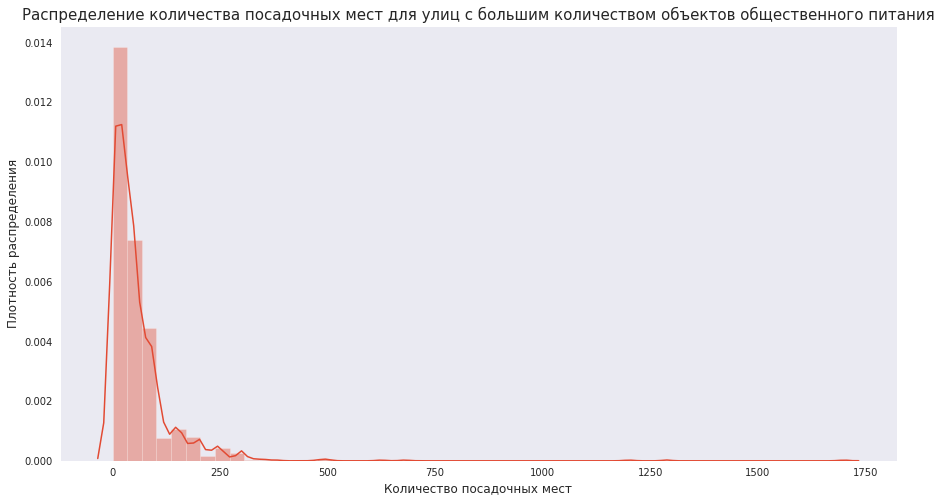

In [50]:
streets_list = top_10_streets['street'].tolist()
top_10_streets_objects = df.query('street in @streets_list')

plt.figure(figsize = (15, 8))
ax = sns.distplot(top_10_streets_objects['number'])

plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания', 
          fontsize = 15)
plt.ylabel('Плотность распределения', fontsize = 12)
plt.xlabel('Количество посадочных мест', fontsize = 12)

plt.show()

In [51]:
top_10_streets_objects['number'].describe()

count    1493.000000
mean       58.219022
std        90.183093
min         0.000000
25%        12.000000
50%        40.000000
75%        75.000000
max      1700.000000
Name: number, dtype: float64

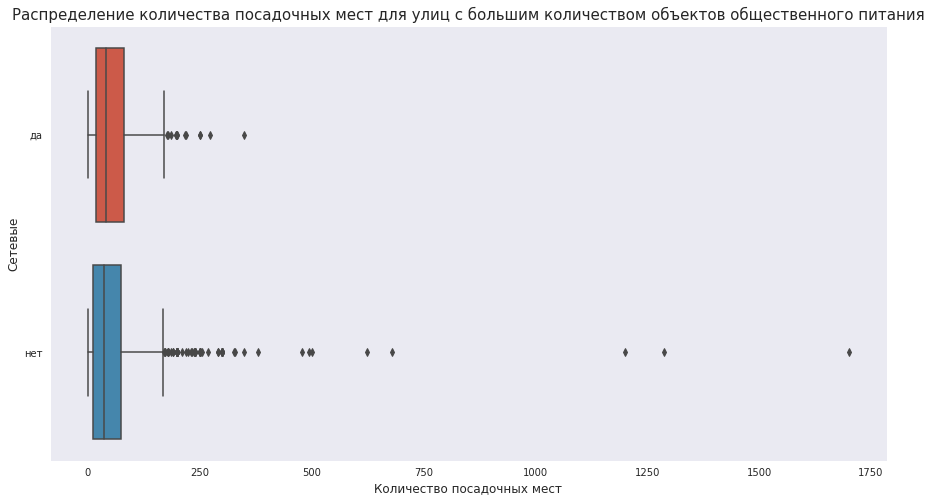

In [52]:
plt.figure(figsize = (15, 8))
ax = sns.boxplot(x = 'number', y = 'chain', data = top_10_streets_objects)

plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания', 
          fontsize = 15)
plt.ylabel('Сетевые', fontsize = 12)
plt.xlabel('Количество посадочных мест', fontsize = 12)

plt.show()

Рассмотрим распределение количества посадочных мест для улиц из списка топ-10.

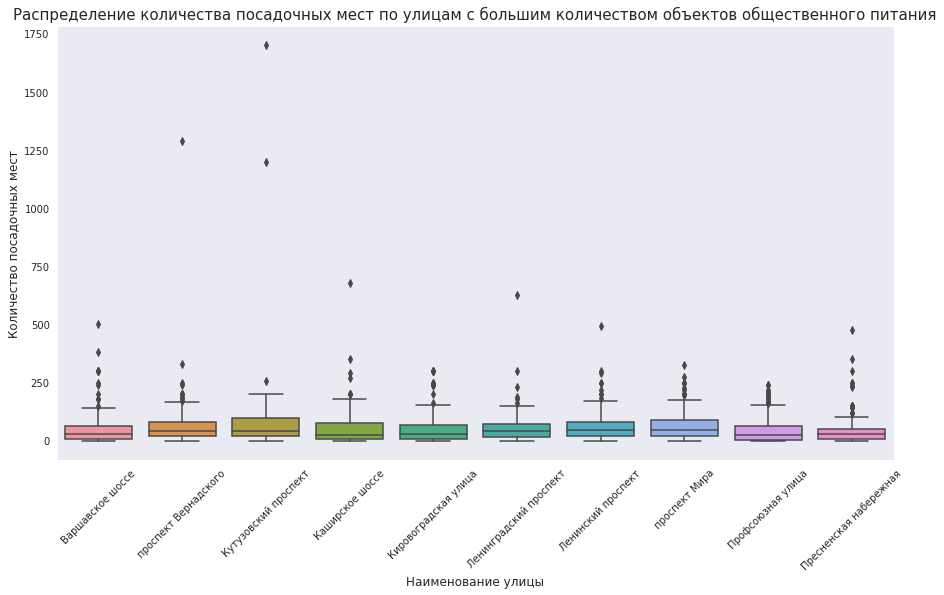

In [53]:
plt.figure(figsize = (15, 8))
ax = sns.boxplot(y = 'number', x = 'street', data = top_10_streets_objects)

plt.title('Распределение количества посадочных мест по улицам с большим количеством объектов общественного питания', 
          fontsize = 15)
plt.ylabel('Количество посадочных мест', fontsize = 12)
plt.xlabel('Наименование улицы', fontsize = 12)
plt.xticks(rotation = 45)

plt.show()

In [54]:
top_10_streets_objects.groupby('street')['number'].describe()

,count,mean,std,min,25%,50%,75%,max
street,,,,,,,,
Варшавское шоссе,164.0,52.475610,74.530387,0.0,8.0,30.0,64.25,500.0
Каширское шоссе,111.0,55.504505,87.962376,0.0,7.0,25.0,77.50,680.0
Кировоградская улица,108.0,59.787037,79.480327,0.0,6.0,30.0,65.50,300.0
Кутузовский проспект,114.0,85.061404,194.464196,0.0,20.0,40.0,96.00,1700.0
Ленинградский проспект,170.0,52.764706,63.361020,0.0,15.0,40.0,70.00,625.0
Ленинский проспект,147.0,63.469388,67.969706,0.0,20.0,45.0,80.00,495.0
Пресненская набережная,167.0,45.844311,65.316834,0.0,8.5,30.0,50.00,478.0
Профсоюзная улица,181.0,46.668508,56.195201,0.0,5.0,24.0,65.00,240.0
проспект Вернадского,128.0,68.804688,123.295181,0.0,20.0,40.0,80.00,1288.0


#### Вывод
Для ООП, расположенных на улицах с большим количеством объектов, характерно наличие меньшего количества посадочных мест, чем в общем по городу. У 75% объектов не больше 75 посадочных мест. В среднем 37 - 59 мест. Наименьшее среднее количество мест у объектов, расположенных на Пресненской набережной, которая отличается от остальных улиц большой плотностью расположения ООП.  

## 4. Общие выводы <a id="conclusion"></a>

«Кафе» - самый распространенный тип объекта общественного питания в Москве: 40% объектов данного типа. На втором месте по количеству объектов тип "столовая" - 17%, на третьем - "ресторан" - 15%.

Сетевые заведения занимают лишь пятую часть от общего числа ООП. Сетевое распространение ниболее характерно для предприятий быстрого обслуживания и магазинов (отделов кулинарии). Наименьшее сетевое распространение получили столовые, буфеты и бары.

Для сетевых заведений характерно в среднем 11 объектов со средним количеством посадочных мест - 55. При этом количество посадочных мест в крупных сетях меньше - в среднем 44.

Самое большое количество посадочных мест в среднем предоставляет «столовая» - 130 мест. На втором месте "рестораны" - 97 посадочных мест.

10% всех объектов общественного питания находятся на 10 улицах Москвы, отличающиеся большой протяженностью. Исключением является небольшая улица - Пресненская набережная со 167 объектами. Наличие большого количества объектов на данной улице связано с расположенным на ней Московским международным деловым центром «Москва-Сити». 

Для заведений, расположенных на улицах с большим количеством объектов общественного питания, характерно наличие меньшего количества посадочных мест, чем в общем по городу. Наименьшее среднее количество мест у объектов, расположенных на Пресненской набережной, которая отличается от остальных улиц большой плотностью расположения ООП - 37 мест.

Самое большое количество улиц с одним ООП находятся в центральных районах Москвы. Возможно это связано с наличием в историческом центре города большого количества маленьких улиц.


**Рекомендации:**
1. Вид заведения - **кафе**. Данный тип объекта общественного питания является наиболее распространенным, а значит и наиболее жизнеспособным. Доля объектов с типом "кафе" - 40%. При успешности заведения и последующем открытии сети заведений тип объекта "кафе" также будет востребованным: доля сетевых кафе среди всех заведений данного типа - 23%.
2. Количество посадочных мест - **40**. В среднем в кафе 40 посадочных мест. Это оптимальное количество и для сетевых и несетевых заведений, подходящее и для расположения в районах с большим количеством объектов общественного питания.
3. Район расположения - **Пресненская набережная**. Данное расположение обеспечит большое скопление потенциальных клиентов, стабильный трафик, т.к. на данной территории большое количество офисов и близко расположены станции метро. На данный момент на небольшой улице расположено 167 объектов общественного питания. За счет нового формата кафе заведение может выиграть в высокой конкурентной борьбе.
4. Возможность развития сети. Закономерным путем развития будет открытие сети кафе, в которых будут обслуживать роботы. Для сетевых заведений характерно небольшое количество объектов в сети (в 75% сетей до 7 объектов) с количеством посадочных мест  в среднем - 55. 

Презентация: <https://yadi.sk/i/S2ord7L4L7RCJQ>